In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from tqdm import trange

In [4]:
P = 2

# Question 1 : 1. Simulation d’un modèle de mélange gaussien diagonal :
— Écrire une fonction qui simule n points du plan suivant un modèle de
mélange de deux lois gaussiennes diagonales (K = 2) définies par leurs
proportions, centres, volumes et formes (on rappelle que les classes seront orientées horizontalement et verticalement, le modèle de mélange
étant diagonal).


In [2]:
def generate_diagonal_gaussian_mixture(n, p, Pi, Mu, Sigma):
    
    assert len(Pi) == len(Mu), f"Pi and Mu have different lengths! ({len(Pi)} and {len(Mu)})"
    assert len(Pi) == len(Sigma), f"Pi and Sigma have different lengths! ({len(Pi)} and {len(Sigma)})"
    assert sum(Pi) == 1, f"Values of Pi do not sum to 1! (sum is {sum(Pi)})"
    
    component_choices = np.random.choice(len(Pi), size=n, p=Pi)

    # Step 2: Sample from the chosen Gaussian
    samples = np.array([
        np.random.normal(loc=Mu[comp], scale=Sigma[comp])
        for comp in component_choices
    ])
    
    return samples, component_choices
    

- Donner quelques exemples de simulations 

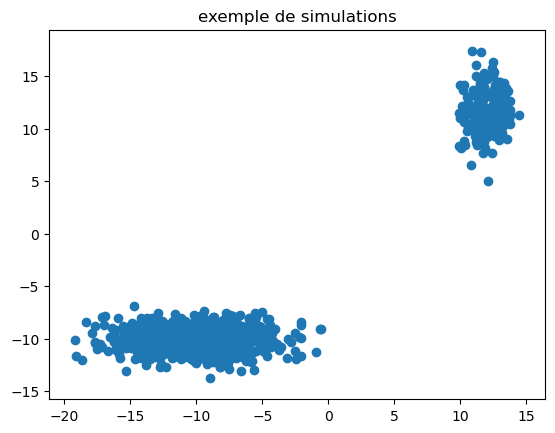

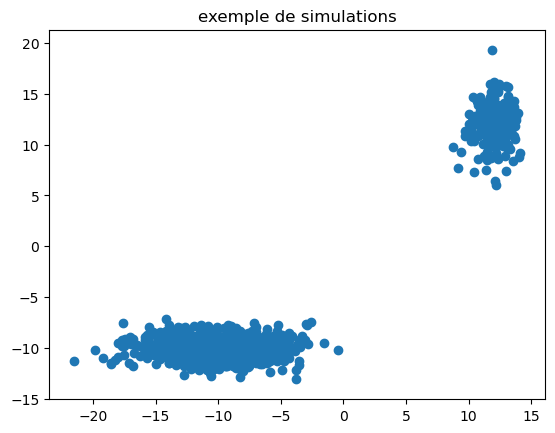

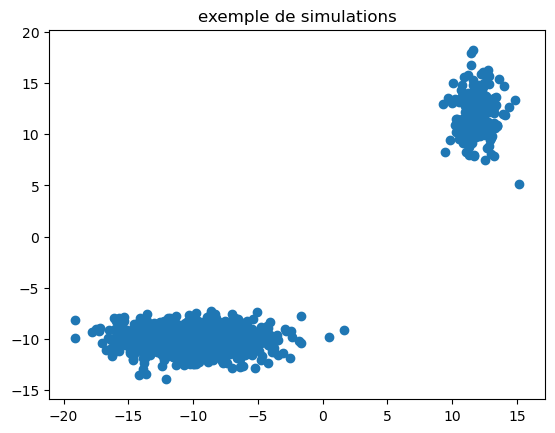

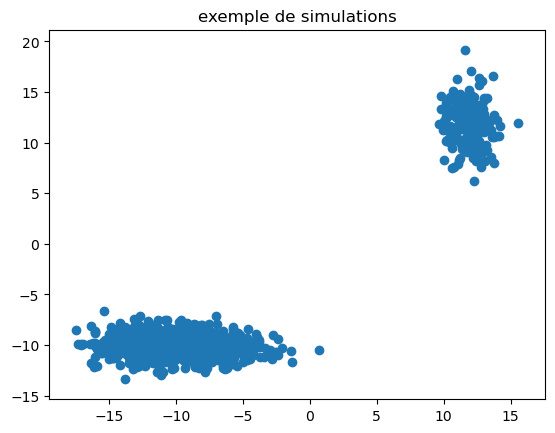

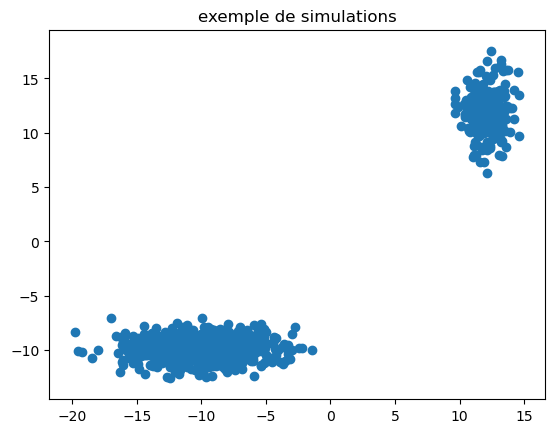

In [29]:
pi1 = 0.8
pi2 = 1-pi1
mu1 = [-10, -10]
mu2 = [12, 12]
sigma1 = [3, 1]
sigma2 = [1, 2]

n = 1000

def plot_samples(samples, true_classes = None):
    
    if true_classes is None:
        true_classes = np.zeros(len(samples))
    for c in np.unique(true_classes):
        plt.scatter(samples[true_classes == c, 0], samples[true_classes == c, 1])
    
    plt.xlim([min(samples[:, 0]) - 2, max(samples[:, 0]) + 2])
    plt.ylim([min(samples[:, 1]) - 2, max(samples[:, 1]) + 2])
    plt.show()
    

for _ in range(5):
    plt.title("exemple de simulations")
    samples, _ = generate_diagonal_gaussian_mixture(n, P, [pi1, pi2], [mu1, mu2], [sigma1, sigma2])
    plot_samples(samples)


# Questions 2:
 Programmer l’algorithme des centres-mobiles (K-means).

In [30]:

def euclidean_distance(a, b):
    return np.linalg.norm(a-b)
    

class Kmeans():
    
    def __init__(self, k, data, distance_fun = euclidean_distance, max_iter = None):
        
        self.k = k
        self.data = data
        self.distance_fun = distance_fun
        self.max_iter = max_iter
    
    def initialize_centroids(self):
        
        centroid_ids = np.random.choice(range(len(self.data)), size=self.k, replace=False)
        centroids = self.data[centroid_ids]
    
        return centroids
    
    def get_class(self, point, centroids: list):
        
        distances = list(map(lambda c: self.distance_fun(point, c), centroids))
        closest_class = np.argmin(distances)
        
        return closest_class
    
    def compute_new_centroids(self, classes):
        
        sums = np.zeros((self.k, self.p))
        counts = np.zeros(self.k)
        
        for i in range(n):
            sums[classes[i]] += self.data[i, :]
            counts[classes[i]] += 1
            
        new_centroids = np.transpose(np.transpose(sums) / counts)
        
        return new_centroids
    
    def run(self):
    
        n, self.p = self.data.shape

        centroids = self.initialize_centroids()
        classes = np.empty(len(self.data), dtype=int)
        iter = 0
        finished = (self.max_iter is not None and iter == self.max_iter)
        while not finished:
            
            for i in range(n):
                classes[i] = self.get_class(self.data[i,:], centroids)
            
            new_centroids = self.compute_new_centroids(classes)
            
            
            iter += 1
            if (new_centroids == centroids).all() or (self.max_iter is not None and iter == self.max_iter):
                finished = True
            centroids = new_centroids
            
        return centroids, classes


def find_accuracy(true_labels, clusters):
    
    best_acc = 0
    
    for perm in permutations(range(len(np.unique(clusters)))):        
        mapped_clusters = np.array([perm[cluster] for cluster in clusters])
        accuracy = np.mean(mapped_clusters == true_labels)
        best_acc = max(best_acc, accuracy)
        
    return best_acc


def show_kmeans(k, data, distance_fun = euclidean_distance):
    
    kmeans = Kmeans(k, data, distance_fun)
    centroids, classes = kmeans.run()
    
    plt.scatter(data[classes == 0, 0], data[classes == 0, 1])
    plt.scatter(data[classes == 1, 0], data[classes == 1, 1])
    
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="+")
    


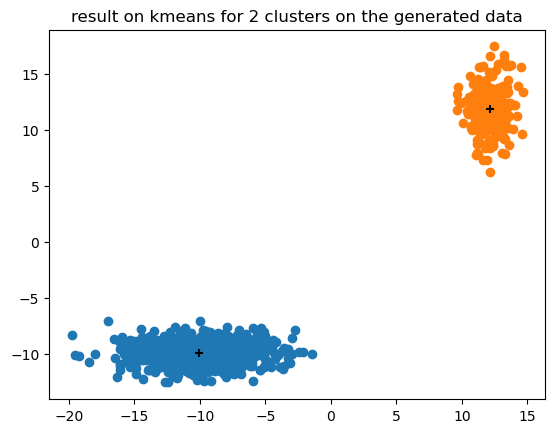

In [31]:
show_kmeans(2, samples)
plt.title("result on kmeans for 2 clusters on the generated data")
plt.show()

# Question 3 :
Simuler n = 1000 points du plan suivant un modèle de mélange gaussien
diagonal de deux densités (K = 2) défini par les proportions des classes
supposées égales (π1 = π2 = 0.5), les variances des classes supposées
égales (Σ1 = Σ2 = diag(1, 1)), les centres des classes (μ1 = (−2, 0)T
et μ2 choisi en fonction des degrés de mélange entre les classes). Les
trois valeurs de μ2 retenues en fonction de leurs taux d’erreur théorique
approximatifs seront μ2 = (1.1, 0)T pour un taux d’erreur théorique approximatif (degré de mélange) de 6 %, μ2 = (0, 0)T pour un taux d’erreur
théorique approximatif de 16 % et μ2 = (−0.6, 0)T pour un taux d’erreur
théorique approximatif de 26 %. Cela donne lieu à trois jeux de données.

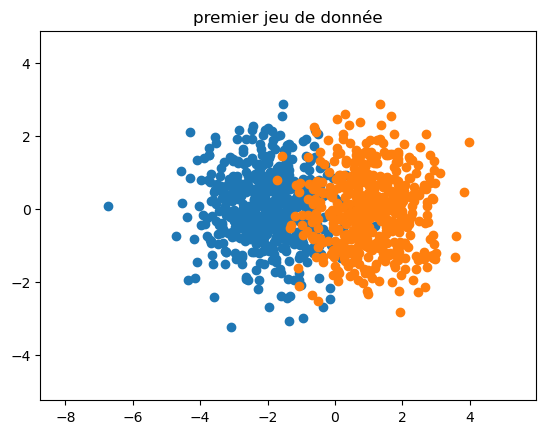

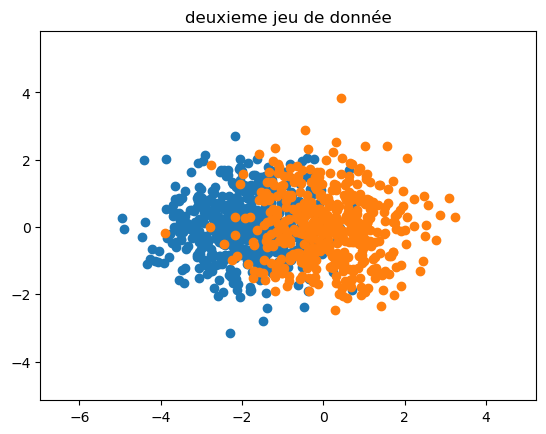

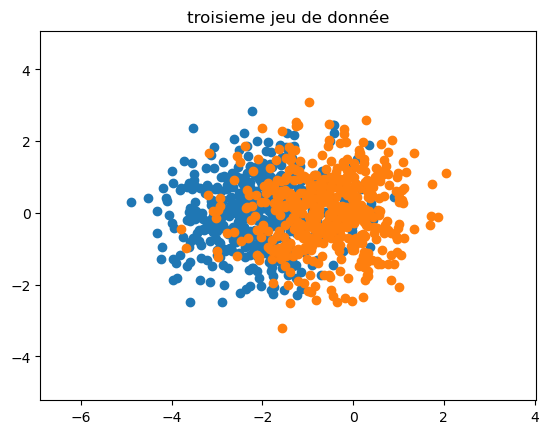

In [ ]:
n = 1000

pi1 = 0.5
pi2 = 1-pi1
sigma1 = [1, 1]
sigma2 = [1, 1]
mu1 = [-2, 0]
mu2_6 = [1.1, 0]
mu2_16 = [0, 0]
mu2_26 = [-0.6, 0]


data_6, true_classes_6 = generate_diagonal_gaussian_mixture(n, P, [pi1, pi2], [mu1, mu2_6], [sigma1, sigma2])
data_16, true_classes_16 = generate_diagonal_gaussian_mixture(n, P, [pi1, pi2], [mu1, mu2_16], [sigma1, sigma2])
data_26, true_classes_26 = generate_diagonal_gaussian_mixture(n, P, [pi1, pi2], [mu1, mu2_26], [sigma1, sigma2])

plt.title("premier jeu de données pour un mélange à 6%")
plot_samples(data_6, true_classes_6)
plt.title("deuxieme jeu de données pour un mélange à 16%")
plot_samples(data_16, true_classes_16)
plt.title("troisieme jeu de données pour un mélange à 26%")
plot_samples(data_26, true_classes_26)


Appliquer l’algorithme des K-means au premier jeu de données (degré
de mélange de 6 %). Lancer l’algorithme plusieurs fois. Faut-il améliorer
l’initialisation de l’algorithme ? Le faire si nécessaire.

In [36]:
class BetterKmeans(Kmeans):
    
    def __init__(self, *args, n_tries_init = 100, **kwargs):
        super().__init__(*args, **kwargs)
        self.n_tries_init = n_tries_init
    
    def initialize_centroids(self):
        
        best_centroids = None
        best_criterion = 0

        for _ in range(self.n_tries_init):
            centroid_ids = np.random.choice(range(len(self.data)), size=self.k, replace=False)
            centroids = self.data[centroid_ids]
            
            criterion = sum([self.distance_fun(c1, c2) for c1 in centroids for c2 in centroids])

            if criterion > best_criterion:
                best_criterion = criterion
                best_centroids = centroids
        
        return best_centroids

In [ ]:
n_repetitions = 1000

accuracies = [[], [], []]
for _ in trange(n_repetitions):

    kmeans_simple = Kmeans(2, data_6)
    _, kmeans_classes_6_simple = kmeans_simple.run()
    accuracies[0].append(find_accuracy(true_classes_6, kmeans_classes_6_simple))
    
    better_kmeans_100 = BetterKmeans(2, data_6)
    _, kmeans_classes_6_100 = better_kmeans_100.run()
    accuracies[1].append(find_accuracy(true_classes_6, kmeans_classes_6_100))
    
    better_kmeans_1000 = BetterKmeans(2, data_6, n_tries_init = 1000)
    _, kmeans_classes_6_1000 = better_kmeans_1000.run()
    accuracies[2].append(find_accuracy(true_classes_6, kmeans_classes_6_1000))

plt.title("result de l'accuracy sur le premier jeu de données pour différentes initialisations")
plt.boxplot(accuracies, labels=["Initial k_means", "kmeans++ 100 initializations", "kmeans++ 1000 initializations"])
plt.show()

 16%|█▌        | 161/1000 [03:27<27:40,  1.98s/it]

100%|██████████| 1000/1000 [02:16<00:00,  7.32it/s]


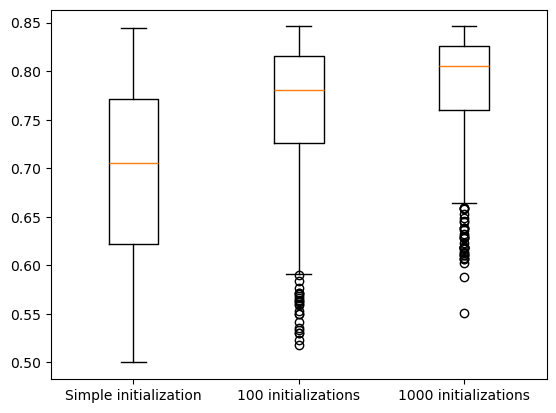

In [ ]:
n_repetitions = 1000

accuracies = [[], [], []]
for _ in trange(n_repetitions):

    kmeans_simple = Kmeans(2, data_16)
    _, kmeans_classes_16_simple = kmeans_simple.run()
    accuracies[0].append(find_accuracy(true_classes_16, kmeans_classes_16_simple))
    
    better_kmeans_100 = BetterKmeans(2, data_16)
    _, kmeans_classes_16_100 = better_kmeans_100.run()
    accuracies[1].append(find_accuracy(true_classes_16, kmeans_classes_16_100))
    
    better_kmeans_1000 = BetterKmeans(2, data_16, n_tries_init = 1000)
    _, kmeans_classes_16_1000 = better_kmeans_1000.run()
    accuracies[2].append(find_accuracy(true_classes_16, kmeans_classes_16_1000))
plt.title("result de l'accuracy sur le deuxième  jeu de données pour différentes initialisations")
plt.boxplot(accuracies, labels=["Initial k_means", "kmeans++ 100 initializations", "kmeans++ 1000 initializations"])
plt.show()

100%|██████████| 1000/1000 [02:21<00:00,  7.06it/s]


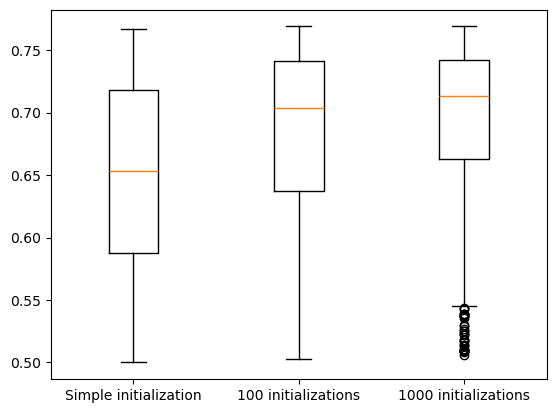

In [ ]:
n_repetitions = 1000

accuracies = [[], [], []]
for _ in trange(n_repetitions):

    kmeans_simple = Kmeans(2, data_26)
    _, kmeans_classes_26_simple = kmeans_simple.run()
    accuracies[0].append(find_accuracy(true_classes_26, kmeans_classes_26_simple))
    
    better_kmeans_100 = BetterKmeans(2, data_26)
    _, kmeans_classes_26_100 = better_kmeans_100.run()
    accuracies[1].append(find_accuracy(true_classes_26, kmeans_classes_26_100))
    
    better_kmeans_1000 = BetterKmeans(2, data_26, n_tries_init = 1000)
    _, kmeans_classes_26_1000 = better_kmeans_1000.run()
    accuracies[2].append(find_accuracy(true_classes_26, kmeans_classes_26_1000))

plt.title("result de l'accuracy sur le premier jeu de données pour différentes initialisations")

plt.boxplot(accuracies, labels=["Initial k_means", "kmeans++ 100 initializations", "kmeans++ 1000 initializations"])
plt.show()

### Q6: Algorithme CEM
. Proposer un algorithme CEM adapté aux trois jeux de données simulées
en précisant le modèle gaussien parcimonieux choisi et donner l’expression de la vraisemblance classifiante maximisée. Appliquer cet algorithme
CEM aux trois jeux de données simulées (degrés de mélange de 6 %, 16
% et 26 %). Commenter.


Les valeurs de sigma et pi nous indique que nous travaillons avec les hypothèses suivantes:
- Les clusters sont sphériques ($\Sigma_k = \lambda_k I$)
- Les clusters sont de volume identique ($\lambda_1 = \lambda_2$)
- Les proportions d'échantillons par cluster sont identiques ($\pi_1 = \pi_2$)

Ainsi, nous utilisons l'algorithme CEM appliquée aux formes sphériques, proportions et volumes identiques. Dans ce cas, la vraisemblance classifiante maximisée s'exprime:

$$L_C(P,\theta) = -\frac{1}{2}\left( np+np\text{log}\left( \frac{\text{trace}(S_W)}{p}\right) \right) -n\text{log}(g)+\frac{np}{2}\text{log}(2\pi)$$

Dans ce cas, maximiser $L_C(P,\theta)$ correspond à minimiser $\text{trace}(S_W)$.

On rappelle l'expression de $S_W$:

$$S_W=\sum_{k=1}^K \sum_{i\in z_k} (x_i-\mu_k)(x_i-\mu_k)^T$$

D'où:

$$\text{trace}(S_W)=\sum_{k=1}^K \sum_{i\in z_k} ||x_i-\mu_k||_2^2$$

On remarque que $\text{trace}(S_W)$ est proportionnel à la somme des variances intra-classe, qui est le critère minimisé par l'algorithme des K-means. Ainsi l'algorithme CEM correspondant à nos hypothèses est l'algorithme des K-means, appliqué précédemment à nos données.